In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/107.7 GB disk)


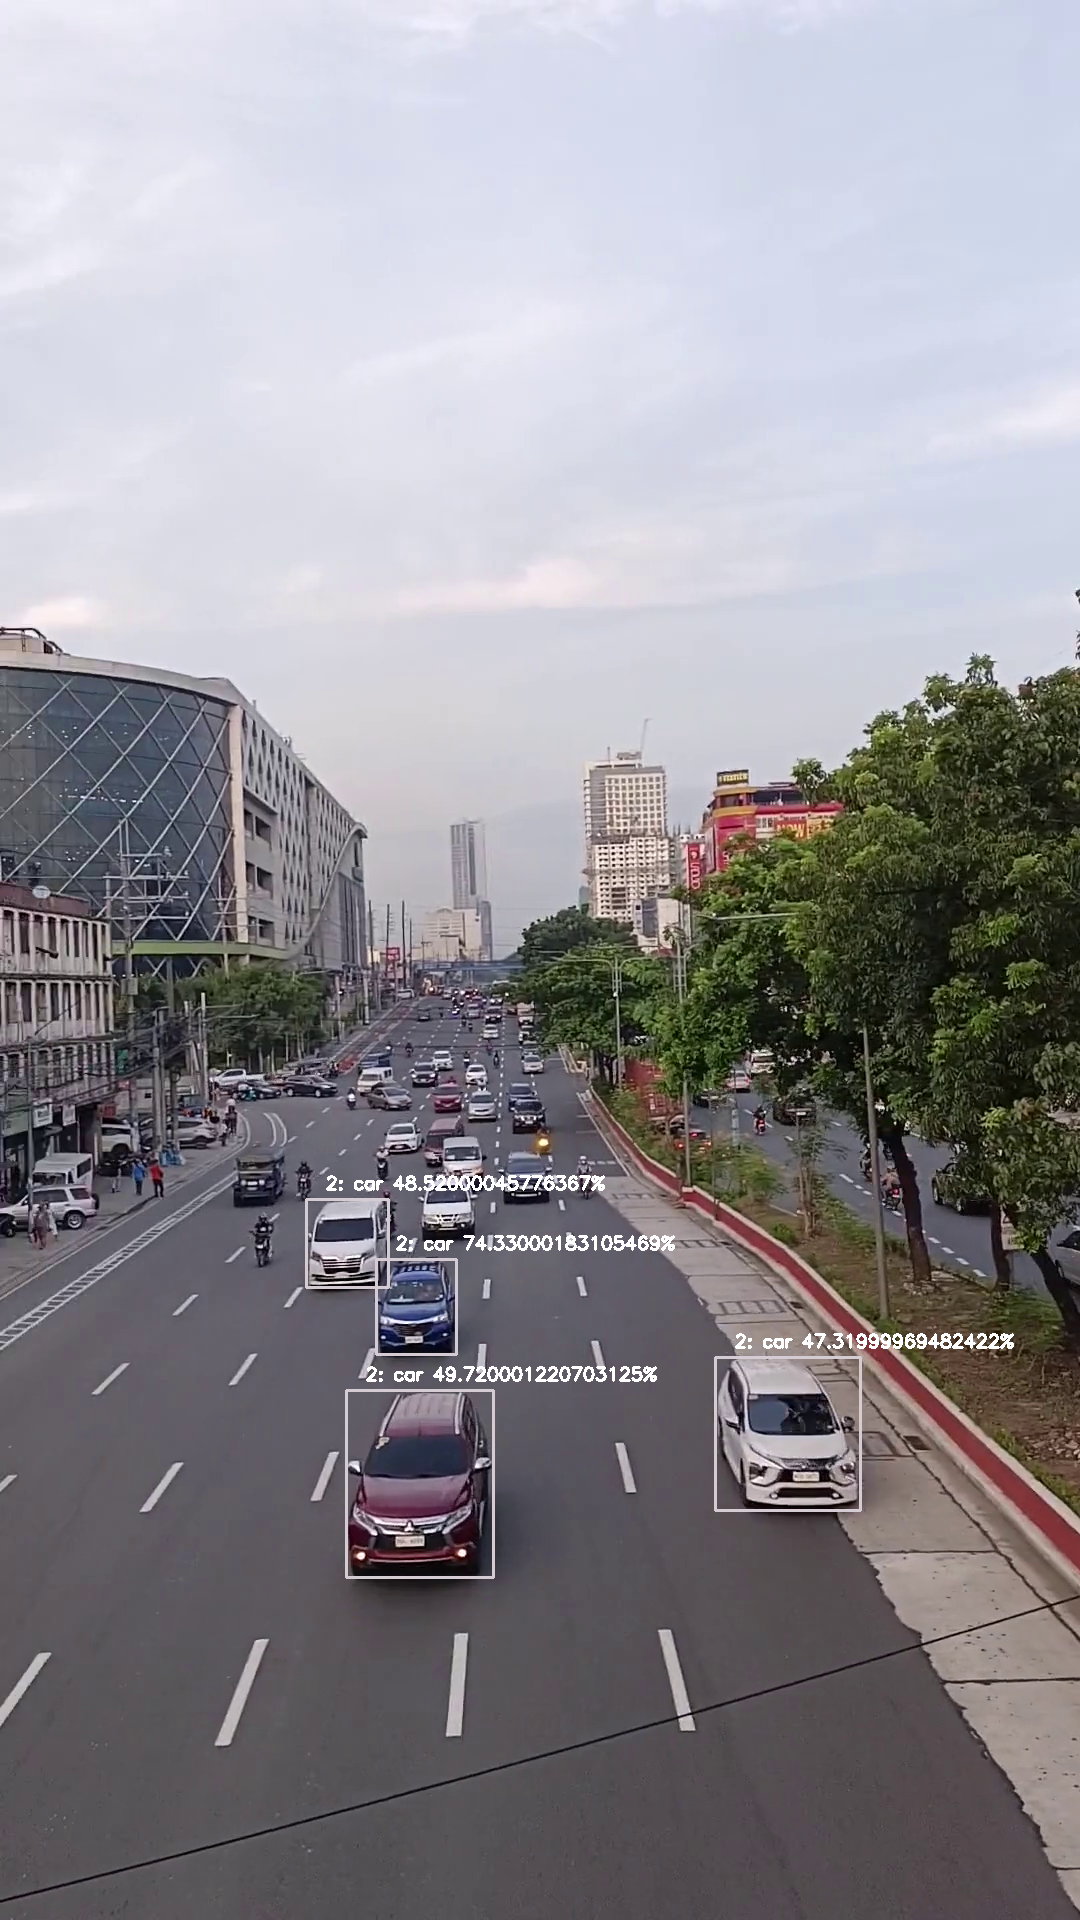

Video ended or failed, exiting...


In [3]:
# Required for display in Google Colab
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

# Core libraries
import random
from ultralytics import YOLO
import cv2

# Load class names
with open('/content/coco.txt', 'r') as my_file:
    class_list = my_file.read().split("\n")

# Generate random colors for each class
detection_colors = []
for _ in range(len(class_list)):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    detection_colors.append((b, g, r))

# Load YOLOv8 model (make sure weights are in place)
model = YOLO("/content/weights/yolov8n.pt")  # update path if needed

# Load video
cap = cv2.VideoCapture('/content/traffic.mp4')

if not cap.isOpened():
    print("Cannot open video file")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video ended or failed, exiting...")
        break

    # Predict using YOLO model
    detect_params = model.predict(source=[frame], conf=0.45, save=False)

    # Convert predictions to numpy
    boxes = detect_params[0].boxes
    for i in range(len(boxes)):
        box = boxes[i]
        clsID = int(box.cls.cpu().numpy()[0])
        conf = box.conf.cpu().numpy()[0]
        bb = box.xyxy.cpu().numpy()[0]

        # Draw bounding box
        cv2.rectangle(
            frame,
            (int(bb[0]), int(bb[1])),
            (int(bb[2]), int(bb[3])),
            detection_colors[clsID],
            2,
        )

        # Display class and confidence
        label = f"{class_list[clsID]} {round(conf * 100, 2)}%"
        cv2.putText(
            frame, label,
            (int(bb[0]), int(bb[1]) - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6, (255, 255, 255), 2
        )

    # Display frame in Colab
    clear_output(wait=True)
    cv2_imshow(frame)
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()
